46053


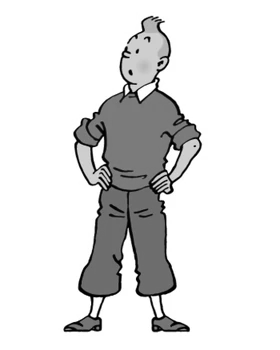

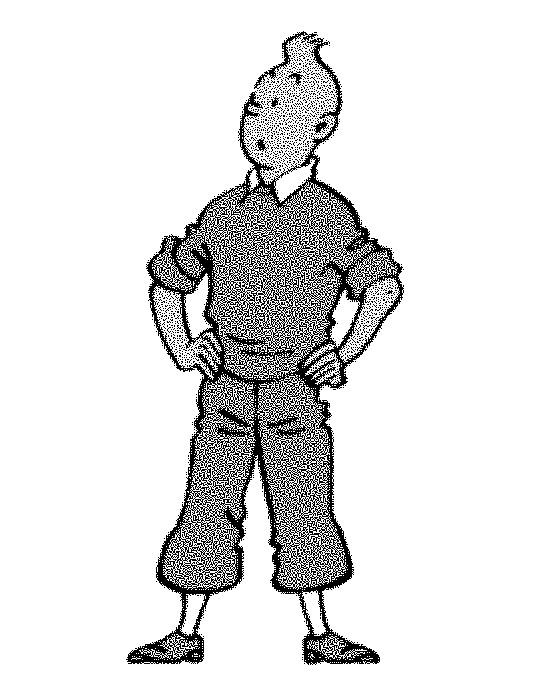

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display
import random

def create_dot_art(input_image_path, output_image_path, square_size):
    input_image = Image.open(input_image_path).convert("L")  # Grayscale conversion
    input_pixels = input_image.load()

    # Calculate the dimensions of the dot art image
    dot_art_width = input_image.width * square_size
    dot_art_height = input_image.height * square_size

    # Create a new image for the dot art
    dot_art = Image.new("RGB", (dot_art_width, dot_art_height), "white")
    draw = ImageDraw.Draw(dot_art)

    black_pixel_count = 0

    # Iterate through each pixel of the input image
    for y in range(input_image.height):
        for x in range(input_image.width):
            # Grayscale intensity of the pixel (inverted)
            intensity = 1 - input_pixels[x, y] / 255

            # Number of black pixels in the square
            num_black_pixels = round(intensity * square_size ** 2)

            # Black pixels randomly placed
            draw.rectangle([(x * square_size, y * square_size), ((x + 1) * square_size, (y + 1) * square_size)], fill="white", outline=None)
            black_pixel_positions = random.sample(range(square_size ** 2), num_black_pixels)
            for i in black_pixel_positions:
                draw.point((x * square_size + i % square_size, y * square_size + i // square_size), fill="black")
                black_pixel_count += 1


    print(black_pixel_count)

    # Display the input image
    display(input_image)

    # Display the dot art image
    display(dot_art)

    # Save the dot art image
    dot_art.save(output_image_path)

create_dot_art("tintin.png", "output_dot_art.png", 2)

In [ ]:
def create_txt():
  with open('ME360GCode.txt', 'w') as file:
    file.write("; This G Code was processed with custom Python code.\n")

def clear_txt():
  with open("your_file.txt", "w"):
    pass

def add_txt(text):
  with open('ME360GCode.txt', 'a') as file:
    file.write(text, "\n")

def pen_up():
  with open('ME360GCode.txt', 'a') as file:
    file.write("M42 P8 S255\n")
    file.write("G4 P1000\n")

def pen_down():
  with open('ME360GCode.txt', 'a') as file:
    file.write("M42 P8 S0\n")
    file.write("G4 P200\n")

def move_to(x, y, f, p):
  with open('ME360GCode.txt', 'a') as file:
    file.write(f"G1 X{x} Y{y} F{f}\n")
    file.write(f"G4 P{p}\n")

def trigger_pen():
  with open('ME360GCode.txt', 'a') as file:
    file.write("M42 P8 S0\n")
    file.write("G4 P200\n")
    file.write("M42 P8 S255\n")
    file.write("G4 P200\n")

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display


def generate_gcode(image, starting_x, starting_y, dot_spacing, feed):
    input_image = Image.open(image).convert("L")  # Grayscale conversion
    input_pixels = input_image.load()
    print(input_pixels[0, 0])
    image_width = input_image.width
    image_height = input_image.height

    print(image_width)
    print(image_height)

    current_x = starting_x

    negative_coord = 0
    left_bound = 0
    up_bound = 0
    right_bound = 1000
    down_bound = 1000

    pause = 400

    clear_txt()
    create_txt()
    pen_up()

    for i in range(image_height):
      current_x = i * dot_spacing
      pause = 1000
      for j in range(image_width):
        if input_pixels[j, i] == 0:
          #print("Move to (", starting_x - (i * dot_spacing), ",", starting_y - (j * dot_spacing), ")")

          #if pause == 1000:
          #  move_to(round(starting_x - (i * dot_spacing), 2), round(starting_y - (j * dot_spacing) + (3 * dot_spacing), 2), feed, pause)
          #  move_to(round(starting_x - (i * dot_spacing), 2), round(starting_y - (j * dot_spacing), 2), feed, 200)
          #else:
          #  move_to(round(starting_x - (i * dot_spacing), 2), round(starting_y - (j * dot_spacing), 2), feed, pause)

          move_to(round(starting_x - (i * dot_spacing), 2), round(starting_y - (j * dot_spacing), 2), feed, pause)

          #print(i * dot_spacing)
          trigger_pen()
          if starting_x - (i * dot_spacing) < 0 or starting_y - (j * dot_spacing) < 0:
            negative_coord = 1
          if starting_x - (i * dot_spacing) > up_bound:
            up_bound = starting_x - (i * dot_spacing)
          if starting_x - (i * dot_spacing) < down_bound:
            down_bound = starting_x - (i * dot_spacing)
          if starting_y - (j * dot_spacing) > left_bound:
            left_bound = starting_y - (j * dot_spacing)
          if starting_y - (j * dot_spacing) < right_bound:
            right_bound = starting_y - (j * dot_spacing)
          pause = 200



    #print("Move to (0, 0)")
    move_to(0, 0, feed, 1000)
    pen_down()

    print("Upper bound: ", round(up_bound, 2))
    print("Lower bound: ", round(down_bound, 2))
    print("Left bound: ", round(left_bound, 2))
    print("Right bound: ", round(right_bound, 2))

    if negative_coord == 1:
      print("WARNING: negative coordinates present")



generate_gcode("output_dot_art.png", 20, 27, 0.2, 500)

255
560
700
Upper bound:  13.8
Lower bound:  -112.8
Left bound:  1.8
Right bound:  -53.6
